## binarization test

In [2]:
# import modules
import torch
import torchOptics.optics as tt
import torchOptics.models as tm
import torchOptics.binary as tb
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import tqdm as tqdm
import warnings
warnings.filterwarnings('ignore')

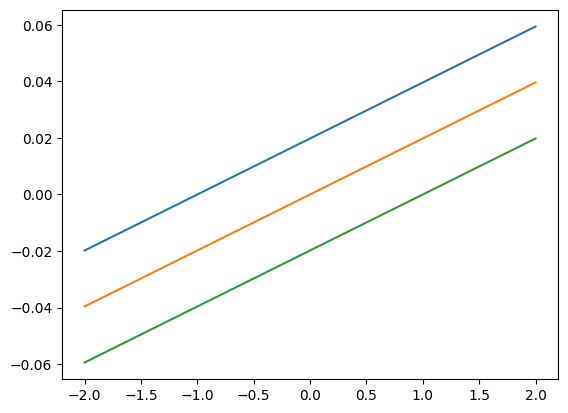

In [6]:
ys = [torch.ones(101)*i for i in [-1,0,1]]

for y in ys:
    x = torch.linspace(-2,2,101)
    x.requires_grad=True
    b = x
    F.mse_loss(b, y).backward()
    plt.plot(x.detach().numpy(), x.grad.numpy())
plt.show()

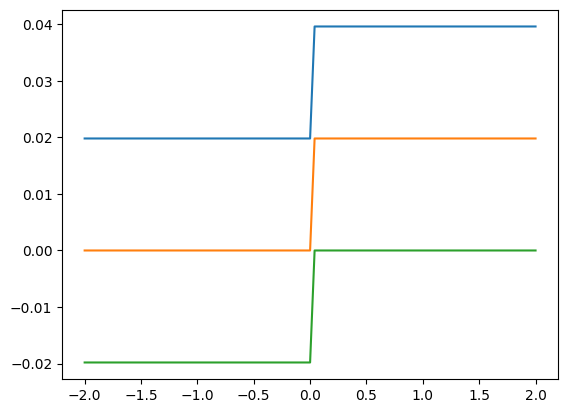

In [7]:
ys = [torch.ones(101)*i for i in [-1,0,1]]

for y in ys:
    x = torch.linspace(-2,2,101)
    x.requires_grad=True
    b = tb.threshold(x)
    F.mse_loss(b, y).backward()
    plt.plot(x.detach().numpy(), x.grad.numpy())
plt.show()

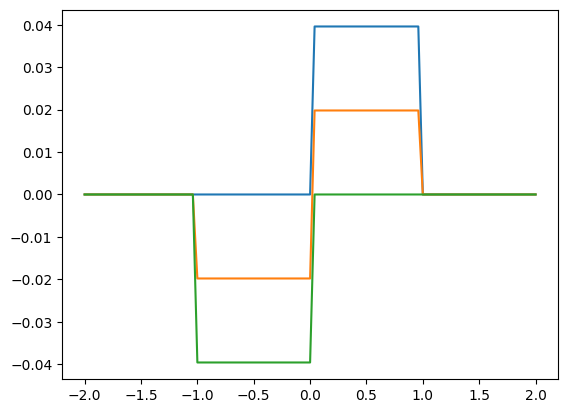

In [9]:
class test(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return torch.sign(input).to(device=input.device)

    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output * ((input>-1) & (input<1)).float()
        return grad_input

sign_new = test.apply


ys = [torch.ones(101)*i for i in [-1,0,1]]

for y in ys:
    x = torch.linspace(-2,2,101)
    x.requires_grad=True
    b = sign_new(x)
    F.mse_loss(b, y).backward()
    plt.plot(x.detach().numpy(), x.grad.numpy())
plt.show()